In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets,metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# load data
X, y = datasets.load_diabetes(return_X_y=True)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Define the optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,clipnorm=0.1)
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,clipnorm=0.1)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01,clipnorm=0.1)
adam = tf.keras.optimizers.Adam(learning_rate=0.01,clipnorm=0.1)

In [4]:
# create model
model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adam.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_adam.add(keras.layers.Dense(units=1))

model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_sgd.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_sgd.add(keras.layers.Dense(units=1))

model_adagrad = keras.models.Sequential()
model_adagrad.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adagrad.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_adagrad.add(keras.layers.Dense(units=1))

model_momentum = keras.models.Sequential()
model_momentum.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_momentum.add(keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]))
model_momentum.add(keras.layers.Dense(units=1))


In [5]:
# compile model
model_adam.compile(optimizer=adam, loss='mse',
              metrics=['mae'])
model_adagrad.compile(optimizer=adagrad, loss='mse',
              metrics=['mae'])
model_sgd.compile(optimizer=sgd, loss='mse',
              metrics=['mae'])
model_momentum.compile(optimizer=momentum, loss='mse',
              metrics=['mae'])

In [6]:
# train model
history_adam = model_adam.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_momentum = model_momentum.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 7s 86ms/step - loss: 27675.6152 - mae: 147.1724 - val_loss: 24327.6738 - val_mae: 139.4775
Epoch 2/100
12/12 [==============================] - 0s 36ms/step - loss: 19333.0508 - mae: 118.6389 - val_loss: 12088.3398 - val_mae: 90.5577
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 7399.6641 - mae: 66.9256 - val_loss: 5022.6318 - val_mae: 52.8993
Epoch 4/100
12/12 [==============================] - 1s 48ms/step - loss: 6447.0005 - mae: 62.2863 - val_loss: 4230.3491 - val_mae: 49.3402
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 3971.5500 - mae: 49.7385 - val_loss: 4099.7617 - val_mae: 49.3847
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 3329.1658 - mae: 45.5560 - val_loss: 3704.1426 - val_mae: 48.0499
Epoch 7/100
12/12 [==============================] - 0s 39ms/step - loss: 2950.7217 - mae: 43.2706 - val_loss: 3613.5823 - val_mae: 46.4746
Epoch 8/100
12/1

In [7]:
# evaluate model
score_adam = model_adam.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adam: {score_adam["loss"]:.4f}')

score_adagrad = model_adagrad.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adagrad: {score_adagrad["loss"]:.4f}')

score_sgd = model_sgd.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - SGD: {score_sgd["loss"]:.4f}')

score_momentum  = model_momentum.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Momentum: {score_momentum["loss"]:.4f}')

3/3 [==============================] - 0s 2ms/step - loss: 3833.9111 - mae: 46.7872
Test loss - Adam: 3833.9111
3/3 [==============================] - 0s 2ms/step - loss: 17957.2520 - mae: 118.8249
Test loss - Adagrad: 17957.2520
3/3 [==============================] - 0s 2ms/step - loss: 25178.8145 - mae: 142.8206
Test loss - SGD: 25178.8145
3/3 [==============================] - 0s 2ms/step - loss: 3447.8149 - mae: 45.2604
Test loss - Momentum: 3447.8149


In [8]:
# make predictions
predictions_adam = model_adam.predict(X_test)
predictions_adagrad = model_adagrad.predict(X_test)
predictions_sgd = model_sgd.predict(X_test)
predictions_momentum = model_momentum.predict(X_test)

3/3 [==============================] - 0s 1ms/step


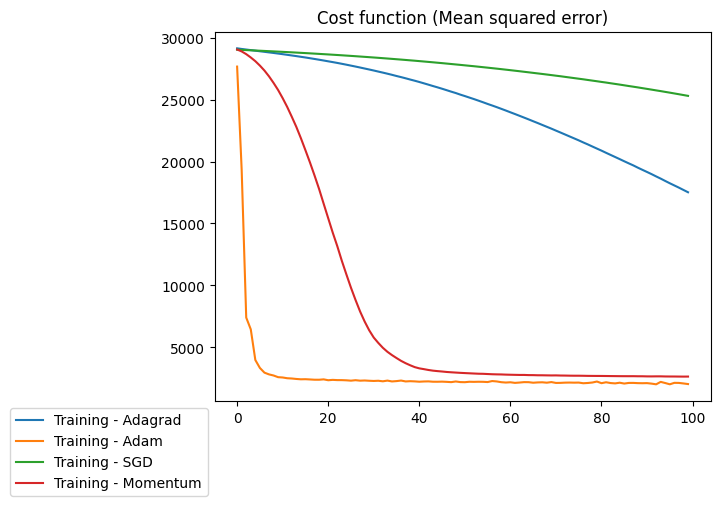

In [9]:
# plot optimization process
plt.plot(history_adagrad.history['loss'], label='Training - Adagrad')

plt.plot(history_adam.history['loss'], label='Training - Adam')

plt.plot(history_sgd.history['loss'], label='Training - SGD')

plt.plot(history_momentum.history['loss'], label='Training - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Mean squared error)')

plt.show()

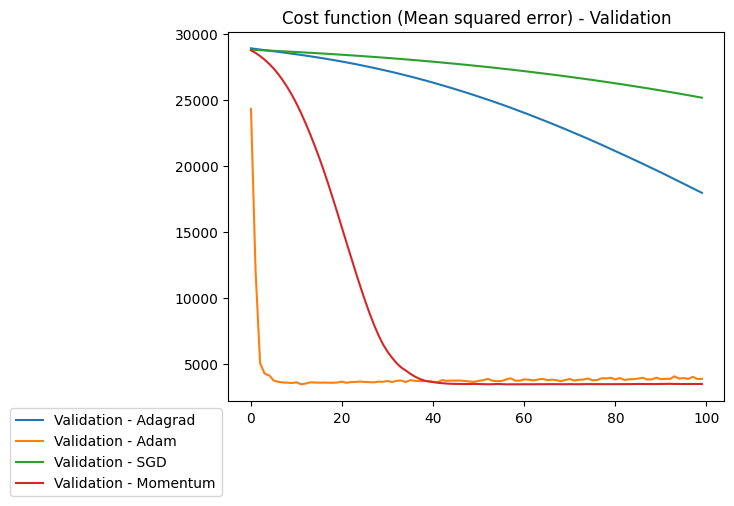

In [10]:
# plot optimization process
plt.plot(history_adagrad.history['val_loss'], label='Validation - Adagrad')

plt.plot(history_adam.history['val_loss'], label='Validation - Adam')

plt.plot(history_sgd.history['val_loss'], label='Validation - SGD')

plt.plot(history_momentum.history['val_loss'], label='Validation - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Cost function (Mean squared error) - Validation')

plt.show()

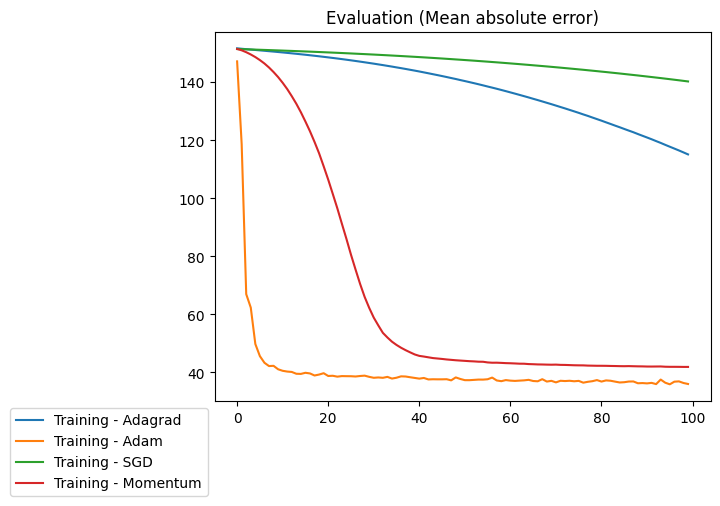

In [11]:
# plot optimization process
plt.plot(history_adagrad.history['mae'], label='Training - Adagrad')

plt.plot(history_adam.history['mae'], label='Training - Adam')

plt.plot(history_sgd.history['mae'], label='Training - SGD')

plt.plot(history_momentum.history['mae'], label='Training - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Evaluation (Mean absolute error)')

plt.show()



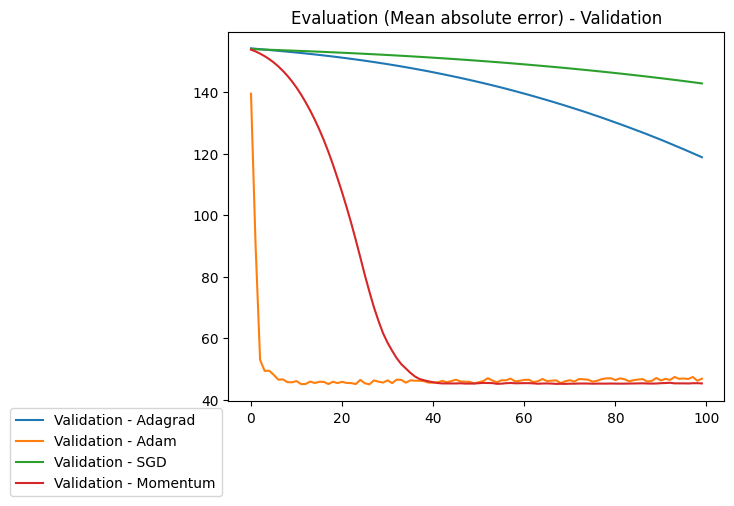

In [12]:
# plot optimization process
plt.plot(history_adagrad.history['val_mae'], label='Validation - Adagrad')

plt.plot(history_adam.history['val_mae'], label='Validation - Adam')

plt.plot(history_sgd.history['val_mae'], label='Validation - SGD')

plt.plot(history_momentum.history['val_mae'], label='Validation - Momentum')

plt.legend(bbox_to_anchor =(0, 0))

plt.title('Evaluation (Mean absolute error) - Validation')

plt.show()

In [13]:
def describe_optimization_results(scores, histories):
    # Find the optimizer with the lowest test loss
    best_optimizer = min(scores, key=lambda x: scores[x]['loss'])

    # Calculate percentage difference between the test losses
    loss_diff = {}
    for opt1 in scores:
        loss_diff[opt1] = {}
        for opt2 in scores:
            if opt1 != opt2:
                loss_diff[opt1][opt2] = (scores[opt1]['loss'] - scores[opt2]['loss']) / scores[opt2]['loss'] * 100

    # Generate textual summary
    summary = f"The optimizer with the lowest test loss is {best_optimizer}, with a test loss of {scores[best_optimizer]['loss']:.4f}.\n"
    for opt1 in loss_diff:
        for opt2 in loss_diff[opt1]:
            summary += f"{opt1} has a {abs(loss_diff[opt1][opt2]):.2f}% {'lower' if loss_diff[opt1][opt2] < 0 else 'higher'} test loss compared to {opt2}.\n"

    # Training convergence analysis
    for opt in histories:
        min_loss_epoch = np.argmin(histories[opt]['loss']) + 1
        min_loss = np.min(histories[opt]['loss'])
        summary += f"{opt} achieved its minimum training loss of {min_loss:.4f} at epoch {min_loss_epoch}.\n"

    return summary

scores = {
    'Adam': score_adam,
    'Adagrad': score_adagrad,
    'SGD': score_sgd,
    'Momentum': score_momentum
}

histories = {
    'Adam': history_adam.history,
    'Adagrad': history_adagrad.history,
    'SGD': history_sgd.history,
    'Momentum': history_momentum.history
}

result_summary = describe_optimization_results(scores, histories)
print(result_summary)


In [14]:
scores = {
    'Adam': score_adam,
    'Adagrad': score_adagrad,
    'SGD': score_sgd,
    'Momentum': score_momentum
}

histories = {
    'Adam': history_adam.history,
    'Adagrad': history_adagrad.history,
    'SGD': history_sgd.history,
    'Momentum': history_momentum.history
}

result_summary = describe_optimization_results(scores, histories)
print(result_summary)


The optimizer with the lowest test loss is Momentum, with a test loss of 3447.8149.
Adam has a 78.65% lower test loss compared to Adagrad.
Adam has a 84.77% lower test loss compared to SGD.
Adam has a 11.20% higher test loss compared to Momentum.
Adagrad has a 368.38% higher test loss compared to Adam.
Adagrad has a 28.68% lower test loss compared to SGD.
Adagrad has a 420.83% higher test loss compared to Momentum.
SGD has a 556.74% higher test loss compared to Adam.
SGD has a 40.22% higher test loss compared to Adagrad.
SGD has a 630.28% higher test loss compared to Momentum.
Momentum has a 10.07% lower test loss compared to Adam.
Momentum has a 80.80% lower test loss compared to Adagrad.
Momentum has a 86.31% lower test loss compared to SGD.
Adam achieved its minimum training loss of 2008.1139 at epoch 93.
Adagrad achieved its minimum training loss of 17523.0234 at epoch 100.
SGD achieved its minimum training loss of 25311.1055 at epoch 100.
Momentum achieved its minimum training los